# Practical Data Visualization

 ### QA

In [95]:
import numpy as numpy
from numpy.random import randn
import pandas as pd 
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

### COLOURS

In [58]:
import math

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

In [41]:
def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

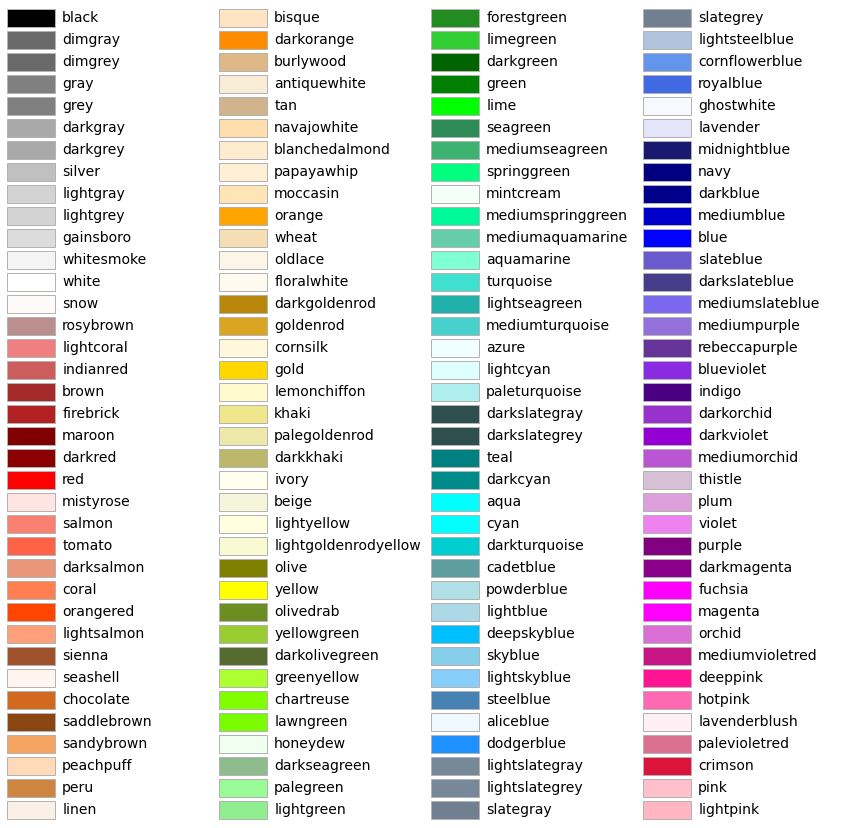

In [42]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

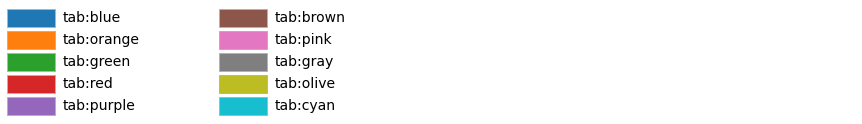

In [51]:
plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False)
plt.show()

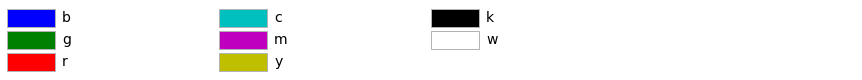

In [54]:
plot_colortable(mcolors.BASE_COLORS, ncols=3, sort_colors=False)
plt.show()

### Creating stardard data graphics

#### LINECHART

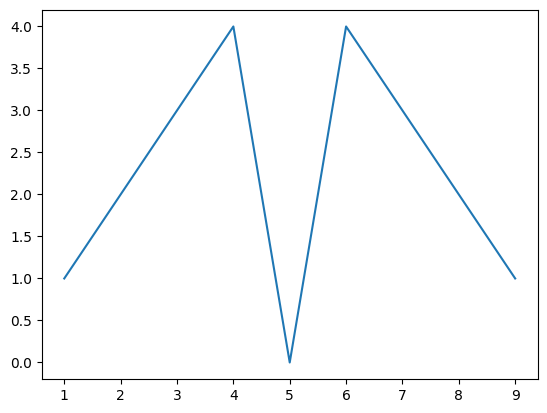

In [6]:
# linechart from list obj
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

plt.plot(x,y)

In [7]:
address = 'data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

mpg = cars['mpg']

<Axes: >

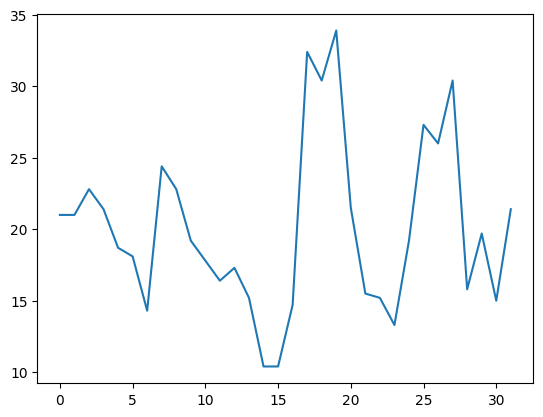

In [8]:
# pandas object
mpg.plot()

<Axes: >

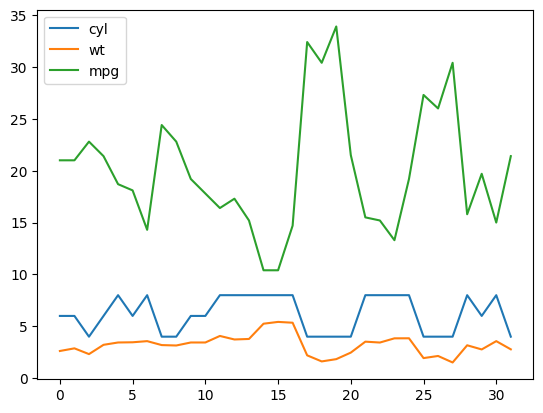

In [9]:
df = cars[['cyl','wt','mpg']]
df.plot()

#### BARCHART

<BarContainer object of 9 artists>

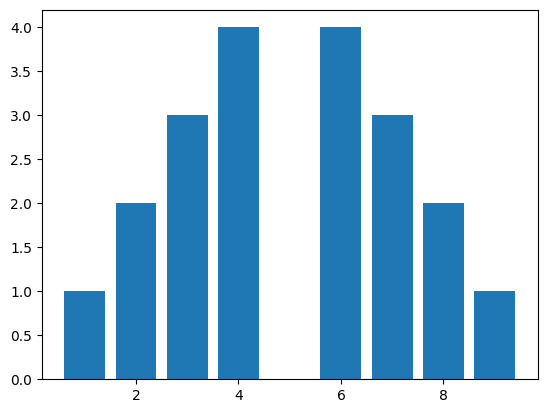

In [10]:
# BARCHART - list obj

plt.bar(x, y)

<Axes: >

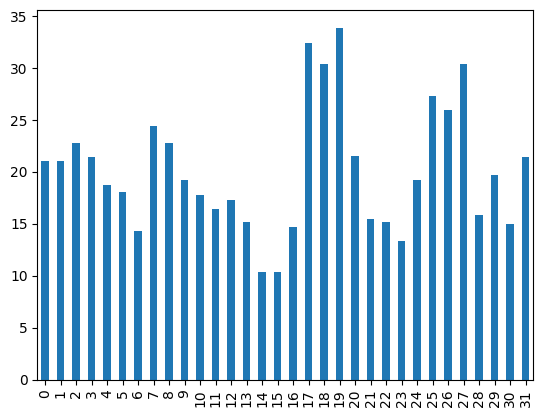

In [11]:
# BARCHART - pandas obj
mpg.plot(kind='bar')

<Axes: >

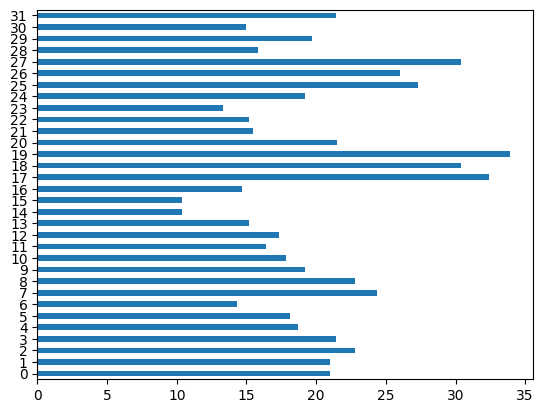

In [12]:
# BARCHART horizontal - pandas obj
mpg.plot(kind='barh')

#### PICHART

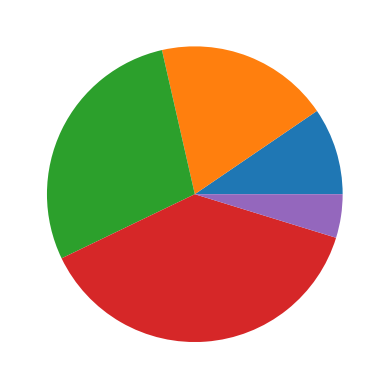

In [13]:
# PIECHART - list obj
x = [1,2,3,4,0.5]
plt.pie(x)
plt.show()

#### SAVING

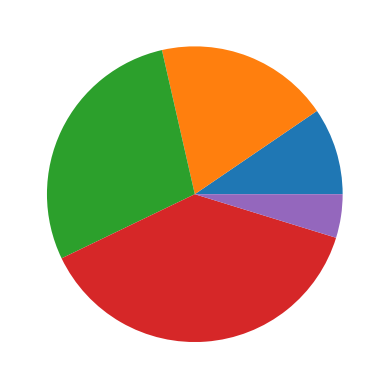

In [15]:
plt.pie(x)
plt.savefig('data/save_files/pie_chart.png')
plt.show()

### Defining elements of a plot

In [17]:
%matplotlib inline
rcParams['figure.figsize']= 5,4

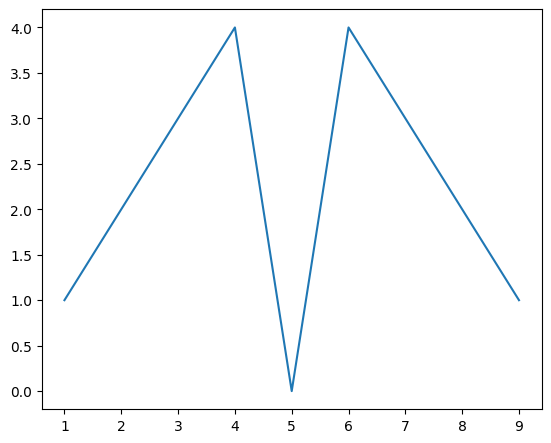

In [20]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure() # blank figure
ax = fig.add_axes([.1,.1,1,1])

ax.plot(x,y)

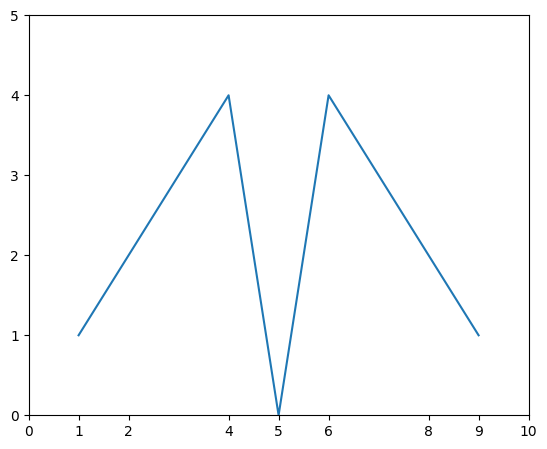

In [21]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.set_xticks([0,1,2,4,5,6,8,9,10])
ax.set_yticks([0,1,2,3,4,5])

ax.plot(x,y)

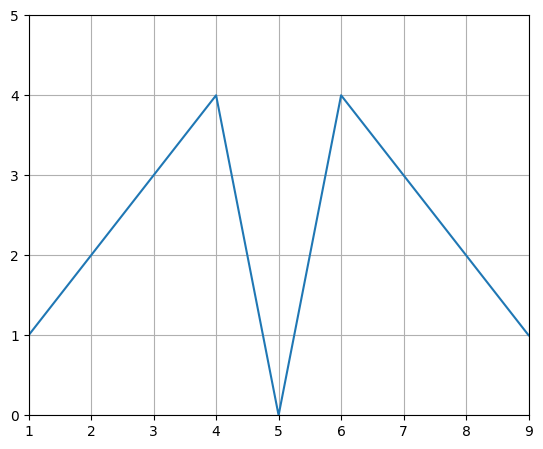

In [22]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.grid()
ax.plot(x,y)

#### Generating multiple plots in one figure with subplots 

<Figure size 500x400 with 0 Axes>

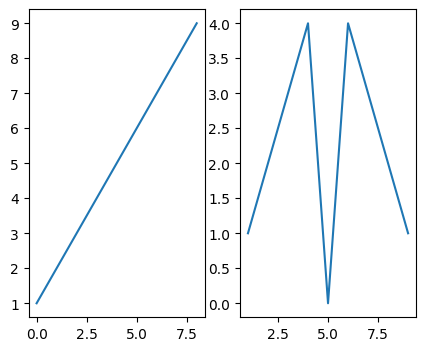

In [23]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(x)
ax2.plot(x,y)

### Plot formatting

#### Define plot colour

<BarContainer object of 9 artists>

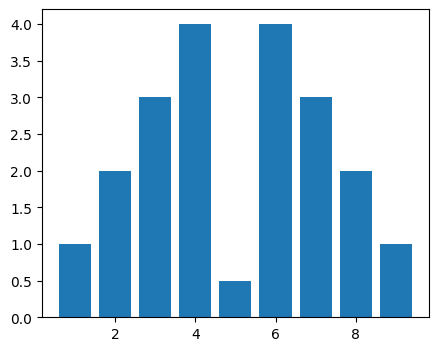

In [24]:
x = range(1,10)
y = [1,2,3,4,0.5,4,3,2,1]

plt.bar(x,y)

<BarContainer object of 9 artists>

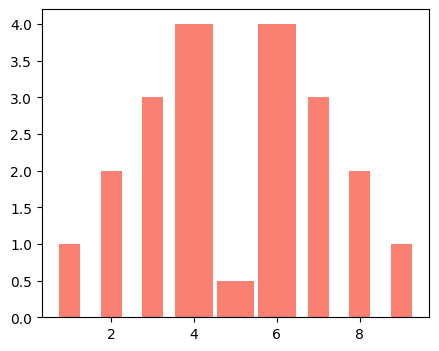

In [25]:
wide = [.5,.5,.5,.9,.9,.9,.5,.5,.5]
color = ['salmon']
plt.bar(x, y, width=wide, color=color, align='center')

<Axes: >

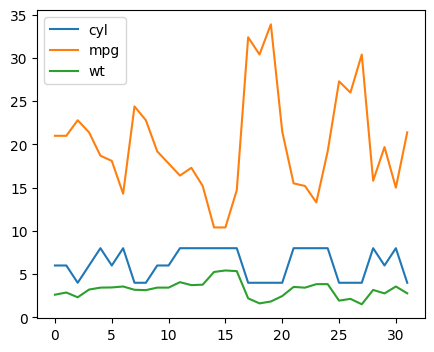

In [59]:
address = 'data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

df = cars[['cyl', 'mpg', 'wt']]
df.plot()

<Axes: >

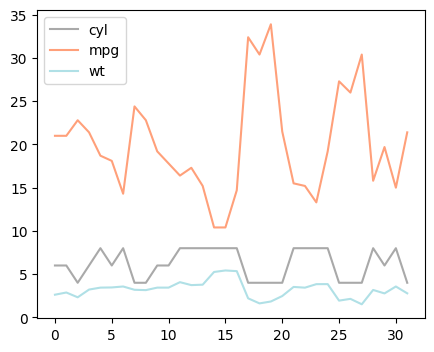

In [60]:
color_theme = ['darkgray', 'lightsalmon', 'powderblue']
df.plot(color=color_theme)

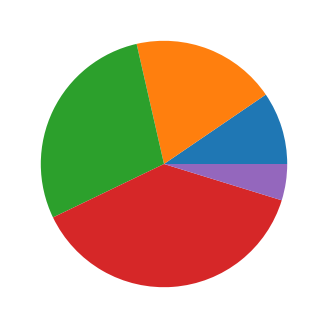

In [61]:
z = [1,2,3,4,.5]
plt.pie(z)
plt.show()

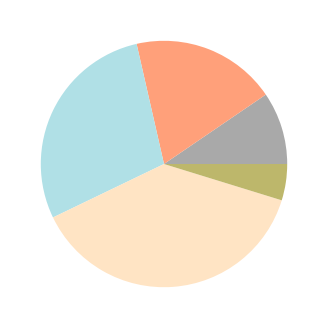

In [62]:
# RGB
color_theme = ['#A9A9A9', '#FFA07A', '#B0E0E6', '#FFE4C4', '#BDB76B']
plt.pie(z, colors=color_theme)
plt.show()

#### Customizing line styles

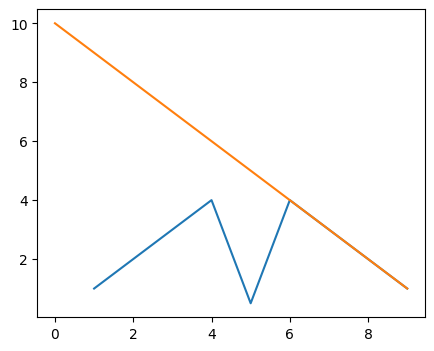

In [63]:
x1 = range(0,10)
y1 = [10,9,8,7,6,5,4,3,2,1]

plt.plot(x, y)
plt.plot(x1, y1)

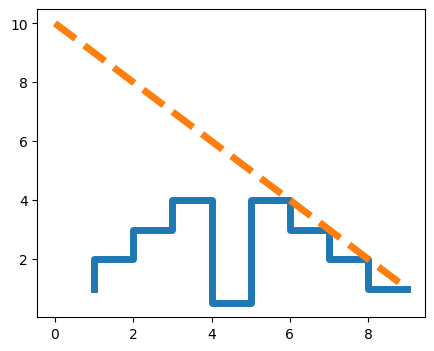

In [65]:
plt.plot(x, y, ds='steps', lw=5)
plt.plot(x1, y1, ls='--', lw=5)

#### Setting plot markers

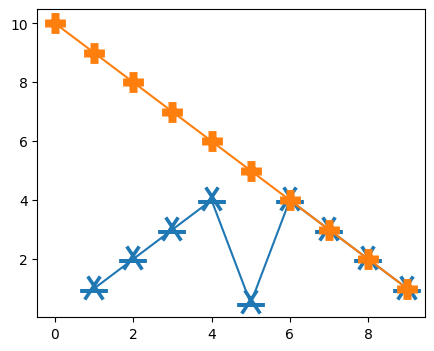

In [73]:
plt.plot(x, y, marker='1', mew=20)
plt.plot(x1, y1, marker='+', mew=15)

### Creating labels and annotations

#### Labeling plot method - functional

Text(0, 0.5, 'your y-axis label')

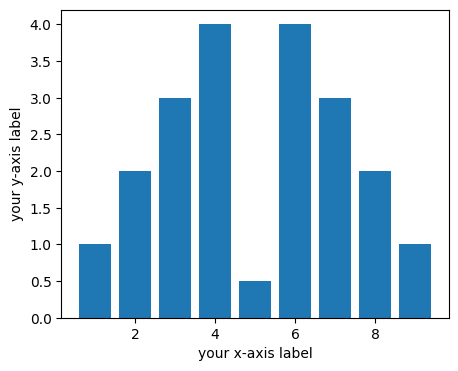

In [74]:
x = range(1,10)
y = [1,2,3,4,.5,4,3,2,1]
plt.bar(x,y)

plt.xlabel('your x-axis label')
plt.ylabel('your y-axis label')

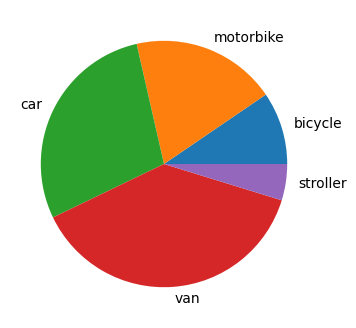

In [75]:
z = [1,2,3,4,.5]
veh_type = ['bicycle', 'motorbike', 'car', 'van', 'stroller']

plt.pie(z, labels=veh_type)
plt.show()

#### Labeling plot method - oop

Text(0, 0.5, 'miles/gal')

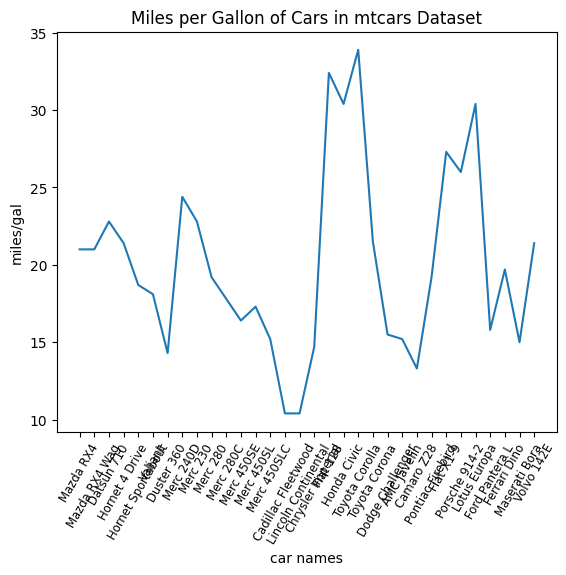

In [81]:
address = 'data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

mpg = cars.mpg

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation=60, fontsize='small')
ax.set_title('Miles per Gallon of Cars in mtcars Dataset')

ax.set_xlabel('car names')
ax.set_ylabel('miles/gal')



#### Adding a legend - func

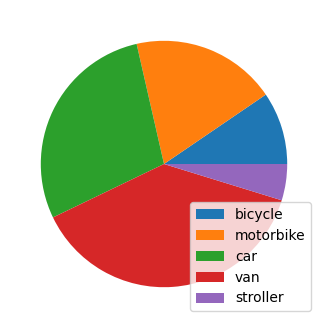

In [82]:
plt.pie(z)
plt.legend(veh_type, loc='best')
plt.show()

#### Adding a legend - oop

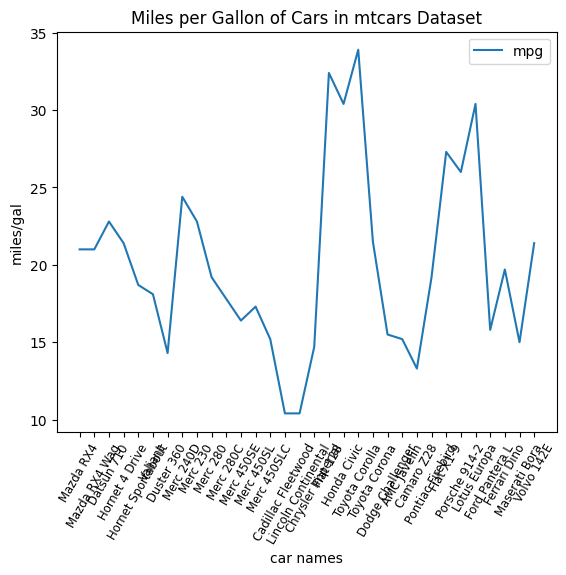

In [84]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation=60, fontsize='small')
ax.set_title('Miles per Gallon of Cars in mtcars Dataset')

ax.set_xlabel('car names')
ax.set_ylabel('miles/gal')

ax.legend(loc='best')   

#### Annotating

In [85]:
mpg.max()

33.9

Text(21, 35, 'Toyota Corolla')

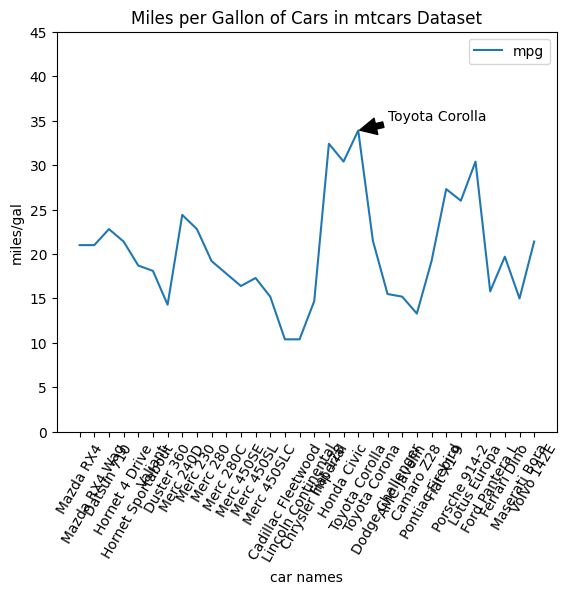

In [86]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Cars in mtcars Dataset')

ax.set_xlabel('car names')
ax.set_ylabel('miles/gal')

ax.legend(loc='best')

ax.set_ylim([0,45])

ax.annotate('Toyota Corolla', xy= (19,33.9), xytext=(21,35),
           arrowprops=dict(facecolor='black', shrink=0.05))

### Visualizing time series

In [88]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [89]:
address = 'data/Superstore-Sales.csv'

df = pd.read_csv(address, index_col='Order Date', encoding='cp1252', parse_dates=True)
df.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


<Axes: xlabel='Order Date'>

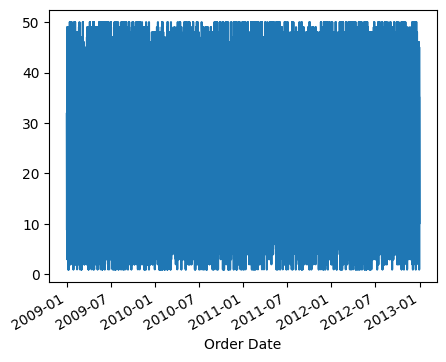

In [90]:
df['Order Quantity'].plot()

<Axes: title={'center': 'Superstore Sales'}, xlabel='Order Date', ylabel='Order Quantity'>

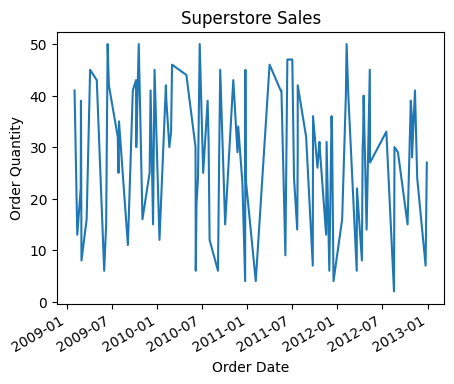

In [91]:
df2 = df.sample(n=100, random_state=25, axis=0)

plt.xlabel('Order Date')
plt.ylabel('Order Quantity')
plt.title('Superstore Sales')

df2['Order Quantity'].plot()

### Creating statistical data graphics

#### Barcharts

<Axes: ylabel='Frequency'>

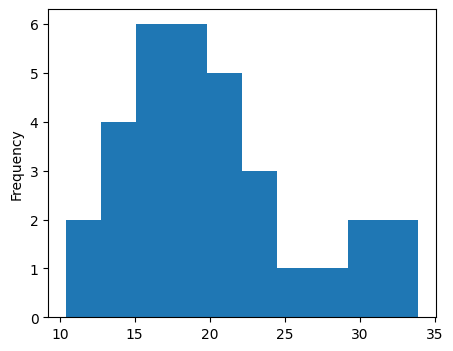

In [92]:
address = 'data/mtcars.csv'

cars = pd.read_csv(address)

cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

cars.index = cars.car_names

mpg = cars['mpg']

mpg.plot(kind='hist')

[]

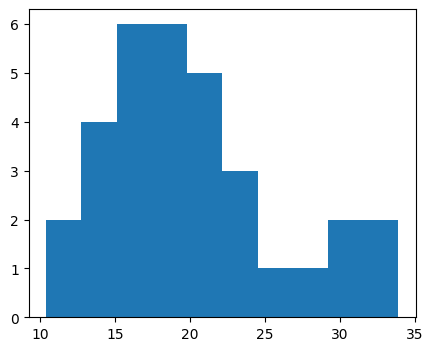

In [106]:
plt.hist(mpg)
plt.plot()

<Axes: xlabel='mpg', ylabel='Count'>

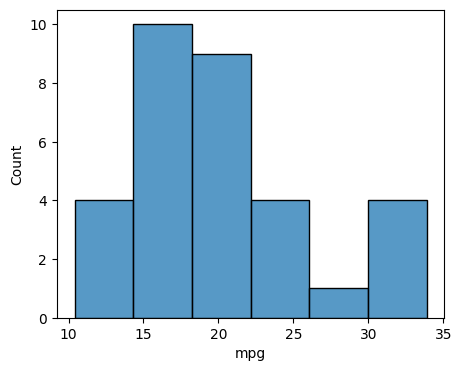

In [107]:
# https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751 - histplot
sb.histplot(mpg)

<Axes: xlabel='mpg', ylabel='Density'>

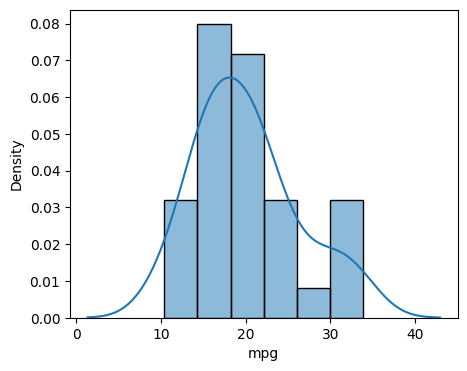

In [104]:
sb.histplot(mpg, kde=True, stat="density", kde_kws=dict(cut=3))

#### Seeing scatterplots in action

<Axes: xlabel='hp', ylabel='mpg'>

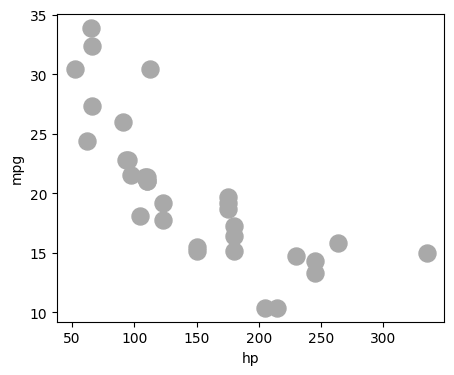

In [108]:
cars.plot(kind='scatter', x='hp', y='mpg', c=['darkgray'], s=150)

<Axes: xlabel='hp', ylabel='mpg'>

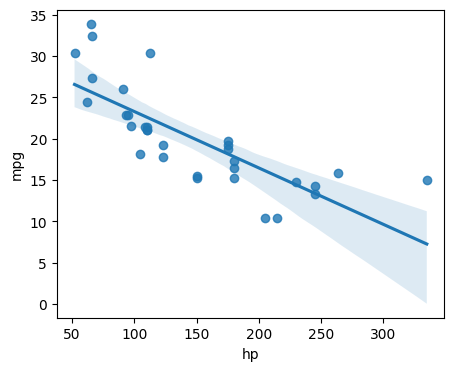

In [109]:
sb.regplot(x='hp', y='mpg', data=cars, scatter=True)

#### Generating a scatter plot matrix

/Users/kaledinaoa/Documents/Projects/DATA-ANALYST/num-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


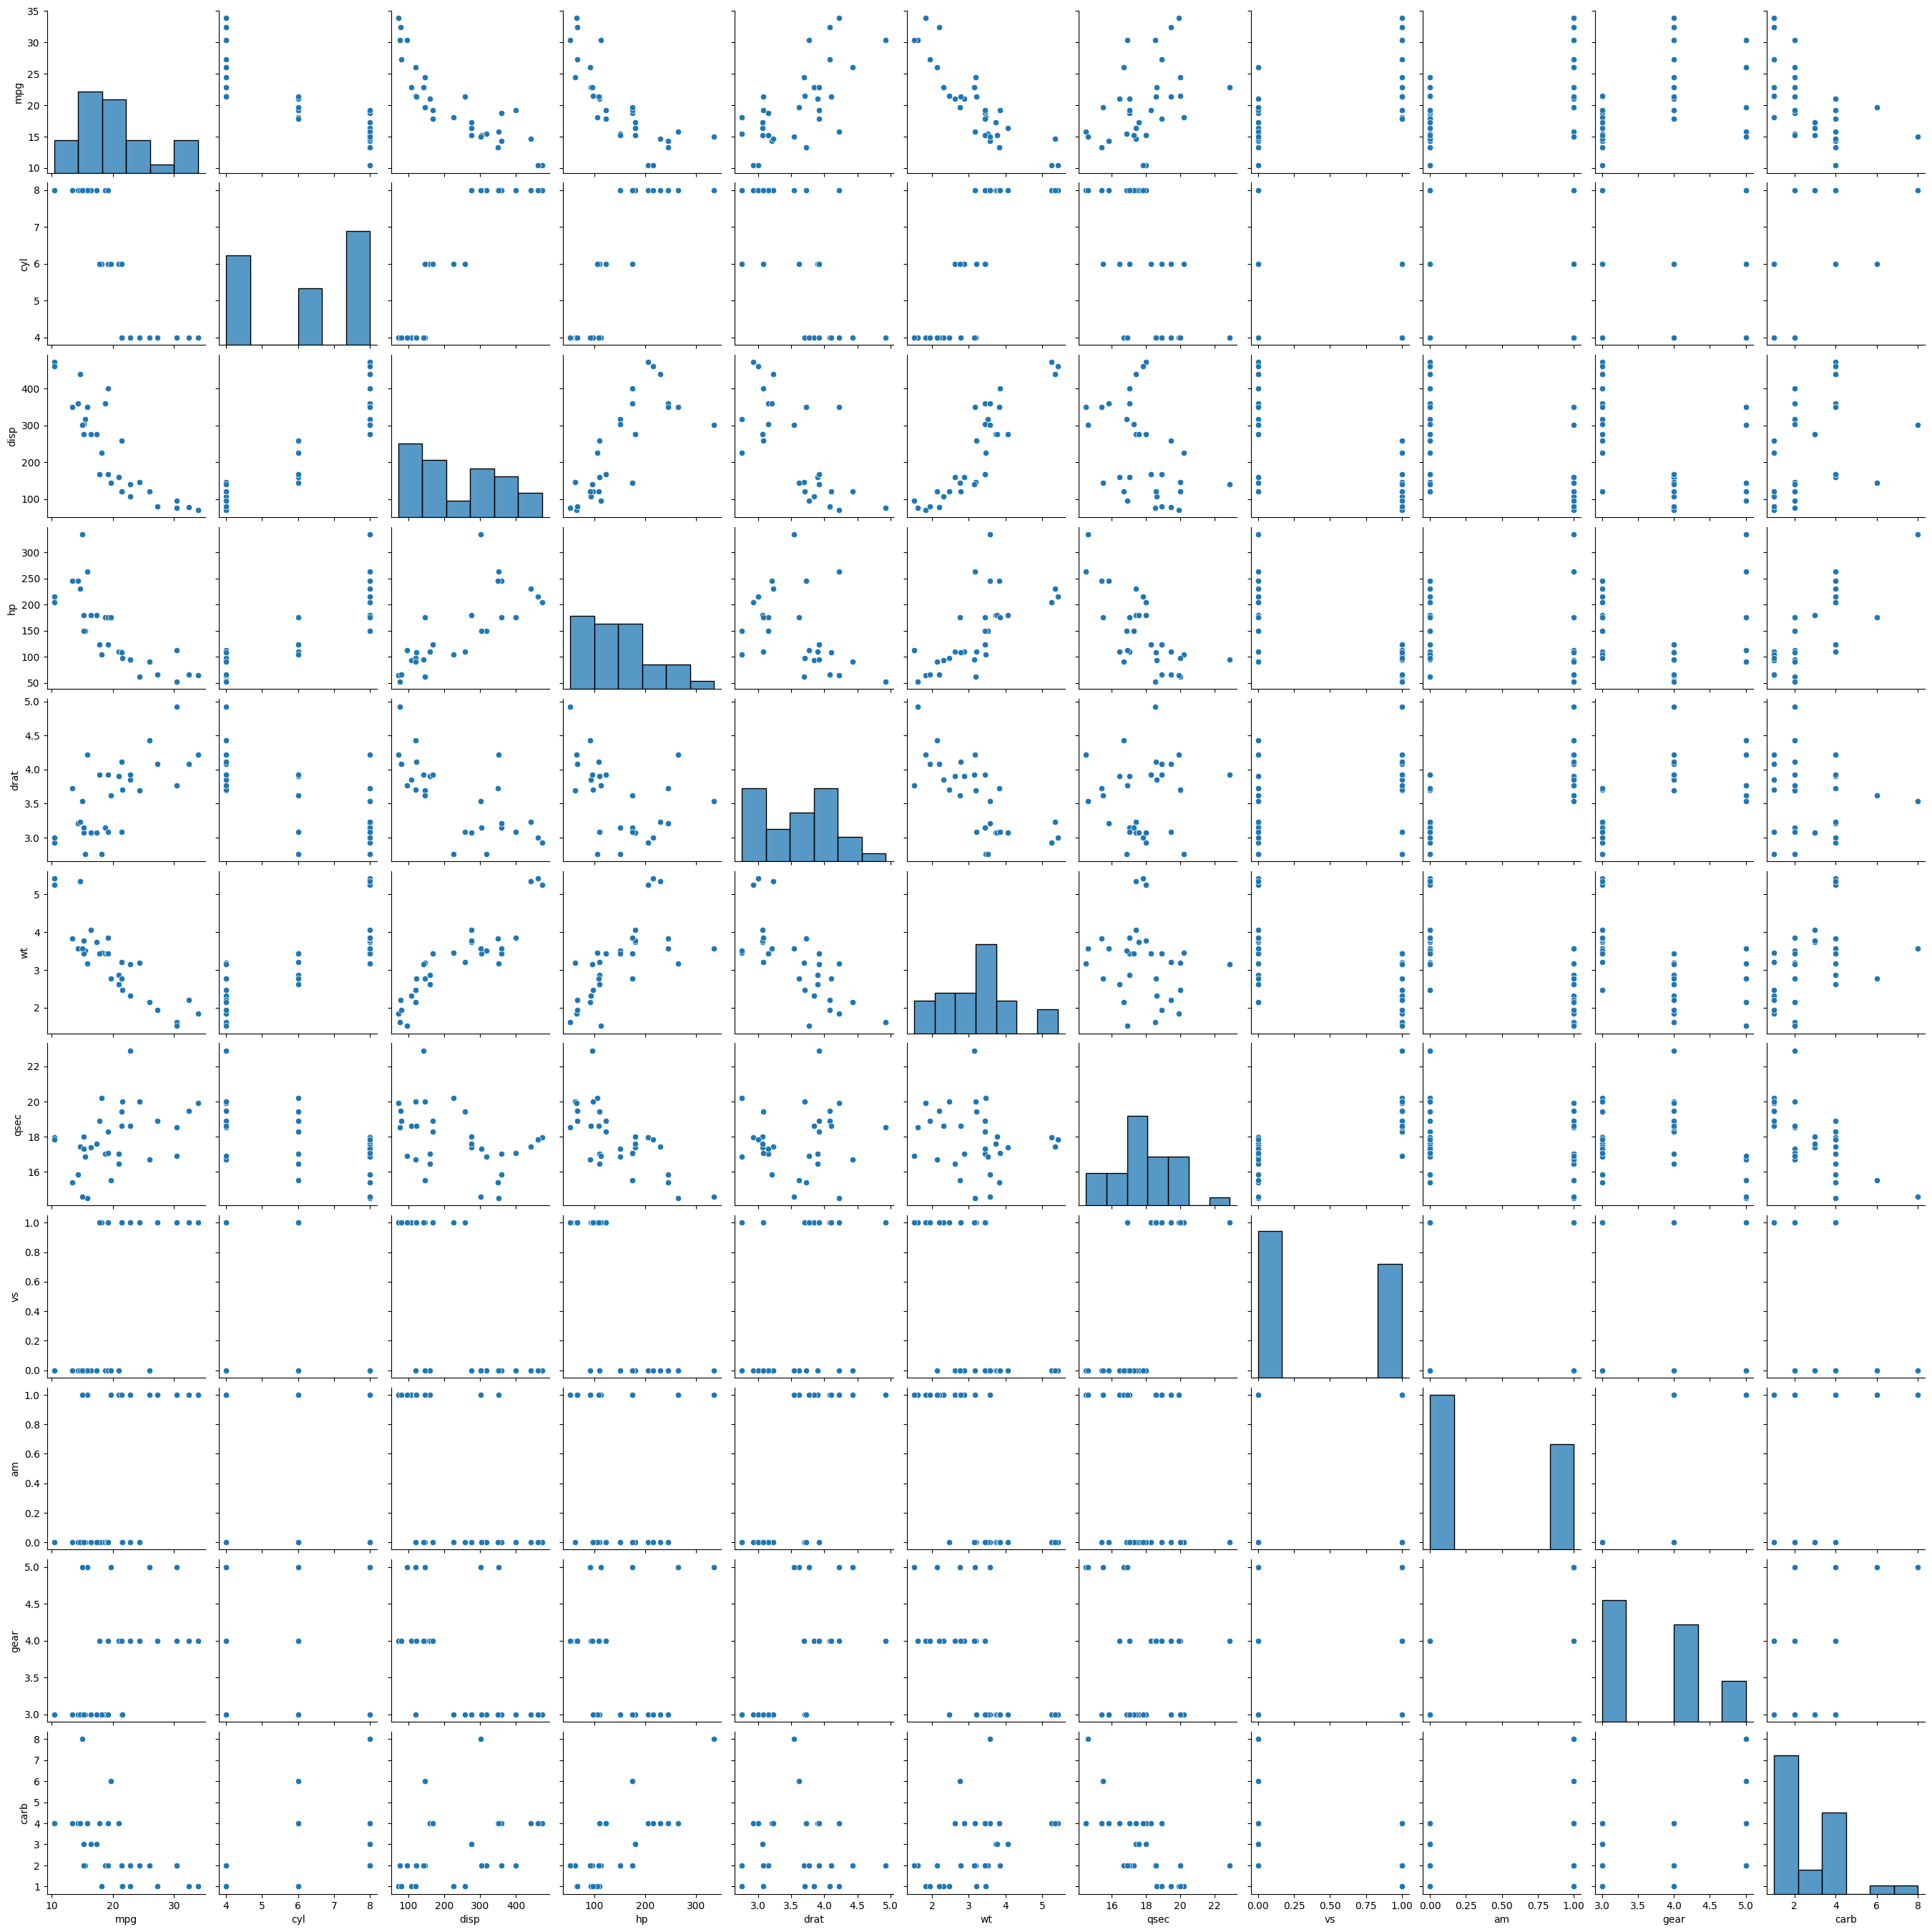

In [110]:
sb.pairplot(cars)

/Users/kaledinaoa/Documents/Projects/DATA-ANALYST/num-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


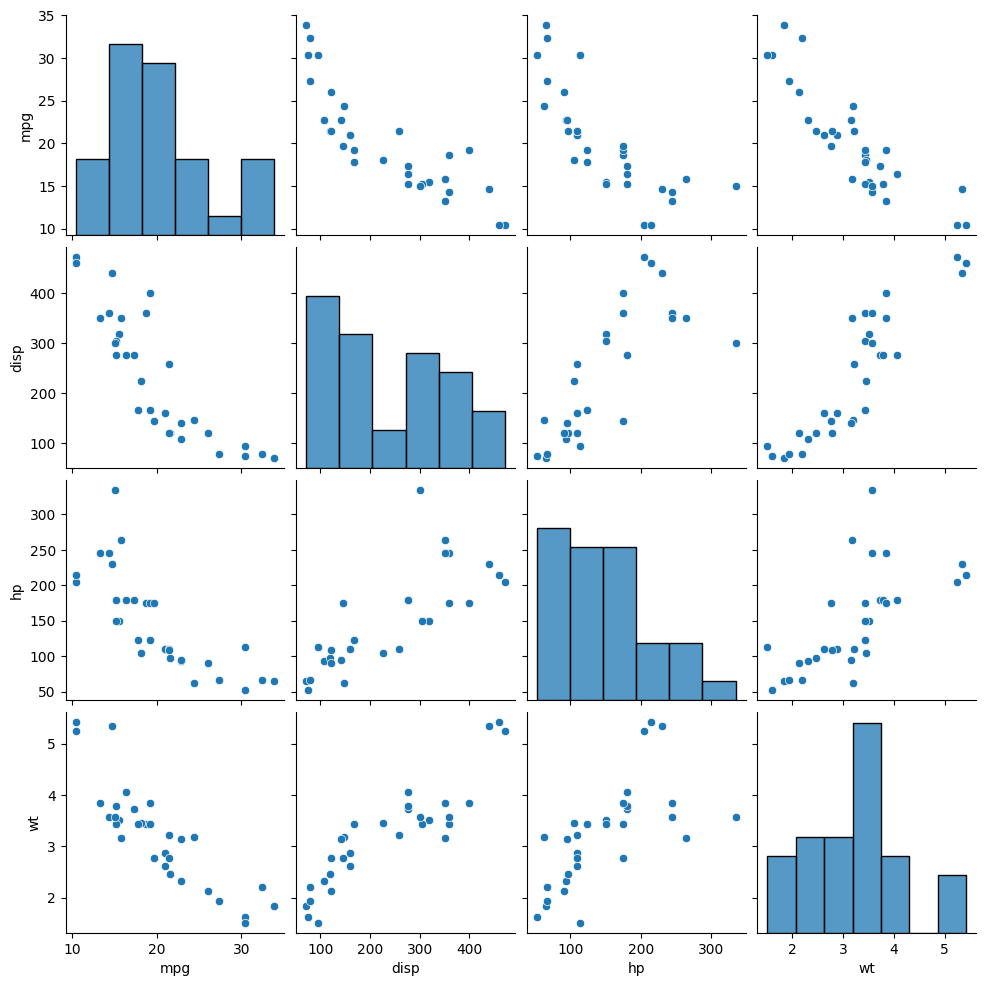

In [111]:
cars_subset = cars[['mpg', 'disp', 'hp', 'wt']]
sb.pairplot(cars_subset)
plt.show()

#### Building boxplots

<Axes: title={'center': 'wt'}, xlabel='am'>

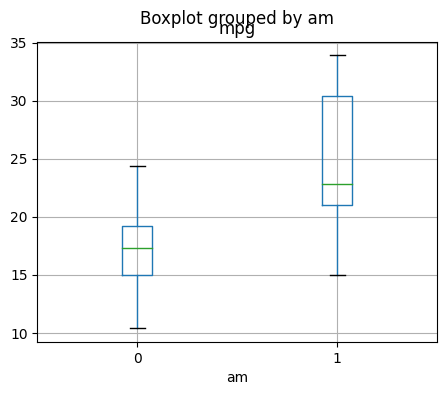

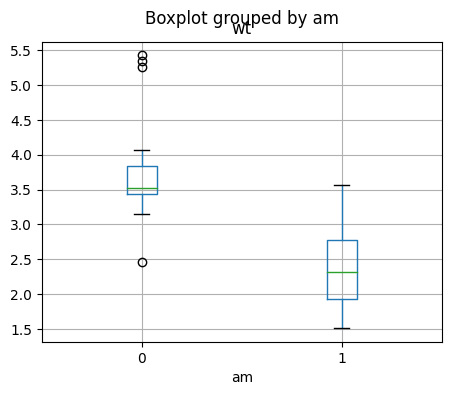

In [112]:
cars.boxplot(column='mpg', by='am')
cars.boxplot(column='wt', by='am')

<Axes: xlabel='am', ylabel='mpg'>

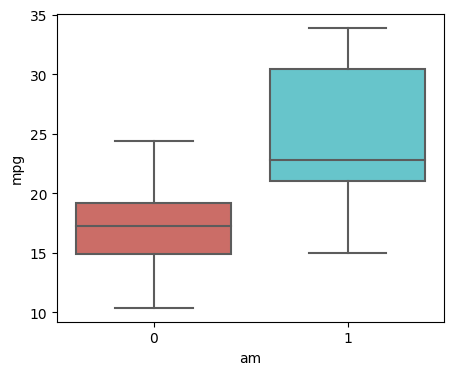

In [113]:
sb.boxplot(x='am', y='mpg', data=cars, palette='hls')